In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

In [11]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def train(self, trainloader, epochs, batch_size):
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.parameters(), lr=0.001)
    
        for epoch in range(epochs):
            running_loss = 0.0
            tqdm_loader = tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)
            for data in tqdm_loader:
                inputs, _ = data  # Desempacotar os dados do DataLoader
                inputs = inputs.view(inputs.size(0), -1)  # Redimensionar para um vetor
                optimizer.zero_grad()
                outputs = self(inputs)
                loss = criterion(outputs, inputs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                tqdm_loader.set_postfix(loss=running_loss / len(tqdm_loader))
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(trainloader)}")
                
    def encode(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        encoded = self.encoder(X)
        return encoded.detach().numpy()

    def decode(self, encoded_data):
        encoded_data = torch.tensor(encoded_data, dtype=torch.float32)
        decoded = self.decoder(encoded_data)
        return decoded.detach().numpy()

In [12]:
# Carregar a base de dados MNIST
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [61]:
# Instanciar o Autoencoder
autoencoder = Autoencoder(input_dim=28*28, encoding_dim=64)  # 28x28 para cada imagem MNIST

# Treinar o Autoencoder
autoencoder.train(trainloader, epochs=20, batch_size=64)

Epoch 1/20, Loss: 0.16925776509174914


Epoch 2/20, Loss: 0.09871500072830013


Epoch 3/20, Loss: 0.08496232468213862


Epoch 4/20, Loss: 0.08064142941856689


Epoch 5/20, Loss: 0.0788167857570943


Epoch 6/20, Loss: 0.07763332711544627


Epoch 7/20, Loss: 0.07701852578502982


Epoch 8/20, Loss: 0.07672961461327986


Epoch 9/20, Loss: 0.07653407688969488


Epoch 10/20, Loss: 0.07638797964622725


Epoch 11/20, Loss: 0.07628976703802151


Epoch 12/20, Loss: 0.07620228431435791


Epoch 13/20, Loss: 0.0761292377737031


Epoch 14/20, Loss: 0.07607605074768636


Epoch 15/20, Loss: 0.07602962822929374


Epoch 16/20, Loss: 0.07598804827851019


Epoch 17/20, Loss: 0.0759440871444084


Epoch 18/20, Loss: 0.07592704955702906


Epoch 19/20, Loss: 0.07588742833846668


Epoch 20/20, Loss: 0.07585043809624878


C:\Users\naanv\AppData\Local\Temp\ipykernel_21140\3174146729.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


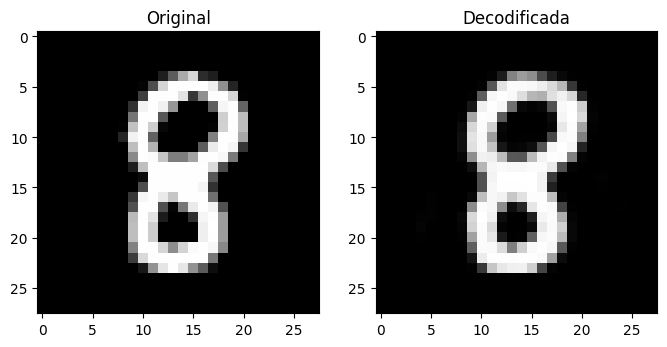

In [67]:
# Codificar e Decodificar uma imagem de exemplo
dataiter = iter(trainloader)
images, _ = next(dataiter)

encoded = autoencoder.encode(images.view(-1, 28*28))  # Codificar
decoded = autoencoder.decode(encoded)  # Decodificar

# Exibir a imagem original e a imagem decodificada
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Decodificada')
plt.imshow(decoded[0].reshape(28, 28), cmap='gray')
plt.show()